In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS
from statsmodels.api import add_constant

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
import os
os.getcwd()

'C:\\Users\\SarShel\\DEC\\CodeSprints\\Regression\\ASPRS'

In [3]:
os.chdir('C:\\Users\\SarShel\\DEC\\Regression')
os.getcwd()

'C:\\Users\\SarShel\\DEC\\Regression'

In [4]:
# Read S2 dataset 
Data1 = pd.read_csv('data_raw/Indices/S2Data.csv')

# Remove none values
S2Data = Data1.dropna()

# Display the first few rows of our DataFrame
S2Data.head()
print(S2Data)

       Year  Month  Day      2BDA      3BDA      NDCI        B1       B10  \
0      2016      5    7  0.956879 -0.044137 -0.022070  0.117900  0.002955   
1      2016      5    7  0.956959 -0.043948 -0.022029  0.117907  0.002955   
2      2016      5    7  1.015101  0.016830  0.007469  0.147959  0.008728   
3      2016      5    7  0.991688 -0.008969 -0.004225  0.142645  0.007528   
4      2016      5    7  0.881265 -0.110070 -0.063161  0.116655  0.002038   
...     ...    ...  ...       ...       ...       ...       ...       ...   
35028  2020     10   30  0.854190 -0.129064 -0.078726  0.152807  0.001676   
35029  2020     10   30  1.077379  0.065607  0.035775  0.126659  0.001469   
35030  2020     10   30  0.946243 -0.050380 -0.027911  0.134852  0.007321   
35031  2020     10   30  0.962221 -0.039201 -0.019493  0.132445  0.007393   
35032  2020     10   30  0.960195 -0.038782 -0.020508  0.126638  0.006003   

            B11       B12  ...        B3        B4        B5        B6  \
0

In [5]:
# Read Field dataset 
Data2 = pd.read_csv('data_raw/Indices/FieldData.csv')

# Remove none values
FieldData = Data2.dropna()

# Display the first few rows of our DataFrame
#FieldData.head()
print(FieldData)

             Lake Name          Y          X       Date  Year  Month  Day  \
0     Little Long Pond  40.977600 -72.296204   6/4/2016  2016      6    4   
1       Cossayuna Lake  43.200600 -73.423401   6/3/2016  2016      6    3   
2           Hatch Lake  42.834598 -75.677803   6/5/2016  2016      6    5   
3      Montgomery Lake  41.525299 -74.917297   6/4/2016  2016      6    4   
4        Lake Devenoge  41.521000 -74.839401   6/4/2016  2016      6    4   
...                ...        ...        ...        ...   ...    ...  ...   
6070         Long Pond  40.975102 -72.290802  7/26/2020  2020      7   26   
6071         Long Pond  40.975102 -72.290802   8/9/2020  2020      8    9   
6072         Long Pond  40.975102 -72.290802  8/23/2020  2020      8   23   
6073         Long Pond  40.975102 -72.290802   9/7/2020  2020      9    7   
6074         Long Pond  40.975102 -72.290802  9/20/2020  2020      9   20   

       Chl-a  
0      1.200  
1      0.600  
2      2.900  
3      2.900  


In [6]:
# Using merge function by setting how='inner'
MergedData = pd.merge(S2Data, FieldData, on=['Y', 'X', 'Year', 'Month', 'Day'], how='inner')
MergedData.to_csv('data_output/Log2bda&ndciModel/MergedData.csv')
  
# displaying result
print(MergedData)

      Year  Month  Day      2BDA      3BDA      NDCI        B1       B10  \
0     2016      6    7  0.951738 -0.048882 -0.024856  0.119966  0.000776   
1     2016      6    7  0.951738 -0.048882 -0.024856  0.119966  0.000776   
2     2016      6    7  0.954945 -0.070901 -0.023265  0.111821  0.001138   
3     2016      6    7  0.954945 -0.070901 -0.023265  0.111821  0.001138   
4     2016      6   10  0.975644 -0.026771 -0.012388  0.116193  0.001103   
...    ...    ...  ...       ...       ...       ...       ...       ...   
1482  2020      9   24  1.006182  0.007508  0.003046  0.136534  0.007655   
1483  2020      9   27  0.985506 -0.017302 -0.007349  0.160810  0.001697   
1484  2020      9   27  0.948135 -0.054520 -0.026673  0.270976  0.003162   
1485  2020      9   30  0.906324 -0.089171 -0.049167  0.135859  0.001359   
1486  2020      9   30  1.060907  0.070528  0.027154  0.190724  0.001834   

           B11       B12  ...        B6        B7        B8       B8A  \
0     0.012669

In [7]:
# Return the natural logarithm of Chl-a (Y)
MergedData['LnChl-a']=np.log(MergedData['Chl-a'])
print(MergedData)

      Year  Month  Day      2BDA      3BDA      NDCI        B1       B10  \
0     2016      6    7  0.951738 -0.048882 -0.024856  0.119966  0.000776   
1     2016      6    7  0.951738 -0.048882 -0.024856  0.119966  0.000776   
2     2016      6    7  0.954945 -0.070901 -0.023265  0.111821  0.001138   
3     2016      6    7  0.954945 -0.070901 -0.023265  0.111821  0.001138   
4     2016      6   10  0.975644 -0.026771 -0.012388  0.116193  0.001103   
...    ...    ...  ...       ...       ...       ...       ...       ...   
1482  2020      9   24  1.006182  0.007508  0.003046  0.136534  0.007655   
1483  2020      9   27  0.985506 -0.017302 -0.007349  0.160810  0.001697   
1484  2020      9   27  0.948135 -0.054520 -0.026673  0.270976  0.003162   
1485  2020      9   30  0.906324 -0.089171 -0.049167  0.135859  0.001359   
1486  2020      9   30  1.060907  0.070528  0.027154  0.190724  0.001834   

           B11       B12  ...        B7        B8       B8A        B9  \
0     0.012669

In [8]:
# Descriptive statistics of all variables
list = ['2BDA', 'NDCI', 'LnChl-a']

# get the summary
desc_mergeddata = MergedData [list].describe()

# add the standard deviation metric
desc_mergeddata.loc['+3_std'] = desc_mergeddata.loc['mean'] + (desc_mergeddata.loc['std'] * 3)
desc_mergeddata.loc['-3_std'] = desc_mergeddata.loc['mean'] - (desc_mergeddata.loc['std'] * 3)

# display it
desc_mergeddata

,2BDA,NDCI,LnChl-a
count,1487.000000,1487.000000,1487.000000
mean,0.995474,-0.005038,1.502210
std,0.132150,0.054806,1.279814
min,0.406412,-0.113502,-2.995732
25%,0.916918,-0.042380,0.641854
50%,0.966684,-0.016578,1.360977
75%,1.048701,0.023032,2.301784
max,2.165665,0.368135,5.113793
+3_std,1.391925,0.159379,5.341652
-3_std,0.599024,-0.169455,-2.337232


In [9]:
# Pearson Coefficient 
corr = MergedData[list].corr(method='pearson')

# display the correlation matrix
display(corr)

,2BDA,NDCI,LnChl-a
2BDA,1.000000,0.947186,0.260471
NDCI,0.947186,1.000000,0.295937
LnChl-a,0.260471,0.295937,1.000000


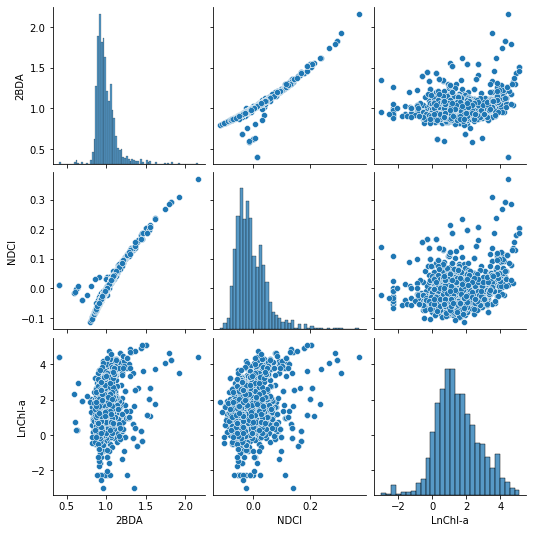

In [10]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(MergedData[list])

In [11]:
# Getting column names
X_columns = ["2BDA", "NDCI"]
Y = MergedData["LnChl-a"]

In [12]:
#Calculate VIFs on our dataset
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(MergedData[X_columns[0:2]].values, i) for i in range(MergedData[X_columns[0:2]].shape[1])]
vif["features"] = MergedData[X_columns[0:2]].columns

# display VIF
vif.round()

,VIF Factor,features
0,1.0,2BDA
1,1.0,NDCI


In [13]:
# Extract independent variables (X) & dependent variable (Y)
X = MergedData[X_columns]
Y = MergedData['LnChl-a']

# Split X and Y into train and test 
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
#regression_model = OLS(Y_train,X_train)
#result = OLS(Y_train,X_train).fit()
#print(result.summary())

In [14]:
X=add_constant(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                LnChl-a   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     45.74
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           9.20e-20
Time:                        14:10:55   Log-Likelihood:                -1691.4
No. Observations:                1040   AIC:                             3389.
Df Residuals:                    1037   BIC:                             3404.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3690      0.865      3.895      0.0

In [15]:
# Get predictions
LnY_predict = result.predict(X_test)
print('Natural logarithm of predicted Y:', LnY_predict)

Natural logarithm of predicted Y: 91      1.133954
1102    0.814958
1237    1.292826
683     1.470007
561     1.382292
          ...   
154     2.161115
639     1.894584
768     1.408884
821     1.169278
1006    2.365565
Length: 447, dtype: float64


In [16]:
import math

Y_predict = np.exp(LnY_predict)

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 14.8
MAE 3.22
RMSE 3.85


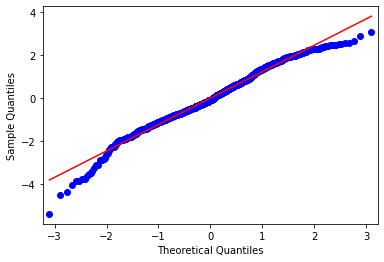

The mean of the residuals is 4.726e-16


In [17]:
import pylab

# check for the normality of the residuals
sm.qqplot(result.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(result.resid)/ len(result.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [18]:
# MergedData: Threshold  Chl-a < 2
MergedData1 = MergedData.loc[(MergedData["LnChl-a"] > 0.6931)]
MergedData1.shape

(1084, 25)

In [19]:
# get the summary
desc_mergeddata1 = MergedData1 [list].describe()

# add the standard deviation metric
desc_mergeddata1.loc['+3_std'] = desc_mergeddata1.loc['mean'] + (desc_mergeddata1.loc['std'] * 3)
desc_mergeddata1.loc['-3_std'] = desc_mergeddata1.loc['mean'] - (desc_mergeddata1.loc['std'] * 3)

# display it
desc_mergeddata1

,2BDA,NDCI,LnChl-a
count,1084.000000,1084.000000,1084.000000
mean,1.003154,-0.001429,2.041754
std,0.136832,0.056091,1.000470
min,0.406412,-0.113502,0.693147
25%,0.921188,-0.040350,1.220092
50%,0.975710,-0.012232,1.822286
75%,1.059531,0.028432,2.647753
max,2.165665,0.368135,5.113793
+3_std,1.413649,0.166844,5.043164
-3_std,0.592659,-0.169703,-0.959657


In [20]:
# Pearson Coefficient 
corr1 = MergedData1[list].corr(method='pearson')

# display the correlation matrix
display(corr1)

,2BDA,NDCI,LnChl-a
2BDA,1.000000,0.950220,0.347002
NDCI,0.950220,1.000000,0.394688
LnChl-a,0.347002,0.394688,1.000000


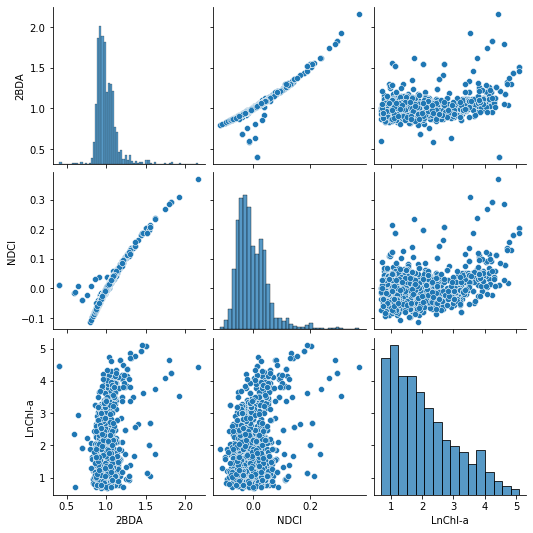

In [21]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(MergedData1[list])

In [22]:
# Extract independent variables (X) & dependent variable (Y)
X = MergedData1[X_columns]
Y = MergedData1['LnChl-a']

# Split X and Y into train and test 
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
#regression_model = OLS(Y_train,X_train)
#result = OLS(Y_train,X_train).fit()
#print(result.summary())

In [23]:
X=add_constant(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                LnChl-a   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     60.12
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           5.90e-25
Time:                        14:11:06   Log-Likelihood:                -1016.9
No. Observations:                 758   AIC:                             2040.
Df Residuals:                     755   BIC:                             2054.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8293      0.842      4.550      0.0

In [24]:
# Get predictions
LnY_predict = result.predict(X_test)
print('Natural logarithm of predicted Y:', LnY_predict)

Natural logarithm of predicted Y: 1226    2.506960
142     2.338974
754     2.312486
500     2.014388
390     2.301227
          ...   
695     1.842625
1038    2.054950
1457    1.790744
883     1.944741
1410    1.658852
Length: 326, dtype: float64


In [25]:
import math

Y_predict = np.exp(LnY_predict)

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 61.9
MAE 6.31
RMSE 7.87


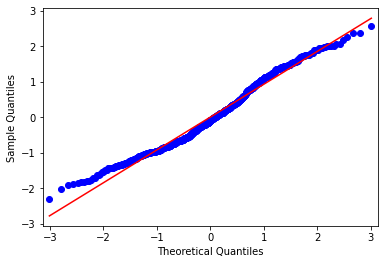

The mean of the residuals is -2.86e-15


In [26]:
import pylab

# check for the normality of the residuals
sm.qqplot(result.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(result.resid)/ len(result.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [27]:
# MergedData: Threshold  Chl-a > 8
MergedData2 = MergedData.loc[(MergedData["LnChl-a"] > 2.0794)]
MergedData2.shape

(442, 25)

In [28]:
# get the summary
desc_mergeddata2 = MergedData2 [list].describe()

# add the standard deviation metric
desc_mergeddata2.loc['+3_std'] = desc_mergeddata2.loc['mean'] + (desc_mergeddata2.loc['std'] * 3)
desc_mergeddata2.loc['-3_std'] = desc_mergeddata2.loc['mean'] - (desc_mergeddata2.loc['std'] * 3)

# display it
desc_mergeddata2

,2BDA,NDCI,LnChl-a
count,442.000000,442.000000,442.000000
mean,1.042967,0.017934,3.048507
std,0.164070,0.062181,0.724178
min,0.406412,-0.084683,2.079442
25%,0.953668,-0.022838,2.445776
50%,1.011739,0.006842,2.917876
75%,1.089973,0.042268,3.551095
max,2.165665,0.368135,5.113793
+3_std,1.535176,0.204476,5.221041
-3_std,0.550758,-0.168608,0.875972


In [29]:
# Pearson Coefficient 
corr2 = MergedData2[list].corr(method='pearson')

# display the correlation matrix
display(corr2)

,2BDA,NDCI,LnChl-a
2BDA,1.000000,0.93932,0.438878
NDCI,0.939320,1.00000,0.515290
LnChl-a,0.438878,0.51529,1.000000


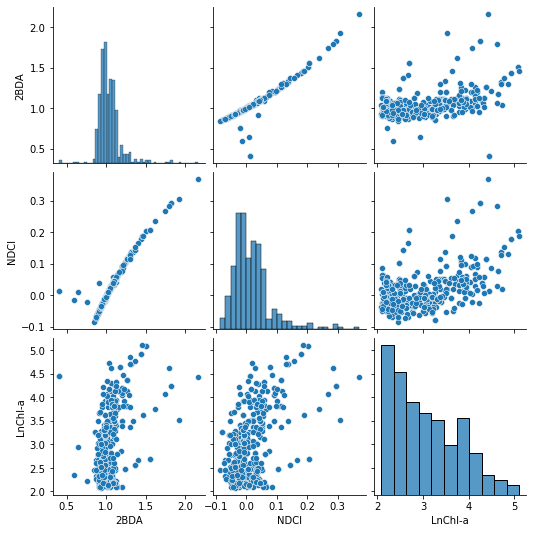

In [30]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(MergedData2[list])

In [31]:
# Extract independent variables (X) & dependent variable (Y)
X = MergedData2[X_columns]
Y = MergedData2['LnChl-a']

# Split X and Y into train and test 
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
#regression_model = OLS(Y_train,X_train)
#result = OLS(Y_train,X_train).fit()
#print(result.summary())

In [32]:
X=add_constant(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                LnChl-a   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     63.18
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           1.07e-23
Time:                        14:11:20   Log-Likelihood:                -292.80
No. Observations:                 309   AIC:                             591.6
Df Residuals:                     306   BIC:                             602.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9141      0.616      7.978      0.0

In [33]:
# Get predictions
LnY_predict = result.predict(X_test)
print('Natural logarithm of predicted Y:', LnY_predict)

Natural logarithm of predicted Y: 844     4.089601
1445    2.882851
950     2.457468
135     2.713280
1227    2.735931
          ...   
1155    2.320904
151     3.235123
675     2.576111
1038    2.967227
338     3.169957
Length: 133, dtype: float64


In [34]:
import math

Y_predict = np.exp(LnY_predict)

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 5.53e+02
MAE 20.1
RMSE 23.5


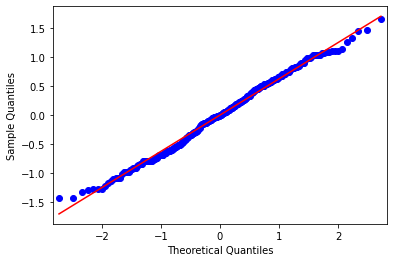

The mean of the residuals is 1.13e-15


In [35]:
import pylab

# check for the normality of the residuals
sm.qqplot(result.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(result.resid)/ len(result.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [36]:
# MergedData: Threshold  Chl-a > 15
MergedData3 = MergedData.loc[(MergedData["LnChl-a"] > 2.7080)]
MergedData3.shape

(263, 25)

In [37]:
# get the summary
desc_mergeddata3 = MergedData3 [list].describe()

# add the standard deviation metric
desc_mergeddata3.loc['+3_std'] = desc_mergeddata3.loc['mean'] + (desc_mergeddata3.loc['std'] * 3)
desc_mergeddata3.loc['-3_std'] = desc_mergeddata3.loc['mean'] - (desc_mergeddata3.loc['std'] * 3)

# display it
desc_mergeddata3

,2BDA,NDCI,LnChl-a
count,263.000000,263.000000,263.000000
mean,1.070563,0.030373,3.512657
std,0.186278,0.067864,0.572412
min,0.406412,-0.078095,2.712042
25%,0.973639,-0.010553,3.026260
50%,1.036768,0.017265,3.405853
75%,1.112373,0.052173,3.918005
max,2.165665,0.368135,5.113793
+3_std,1.629397,0.233966,5.229894
-3_std,0.511730,-0.173220,1.795419


In [39]:
# Pearson Coefficient 
corr3 = MergedData3[list].corr(method='pearson')

# display the correlation matrix
display(corr3)

,2BDA,NDCI,LnChl-a
2BDA,1.000000,0.937169,0.509654
NDCI,0.937169,1.000000,0.626425
LnChl-a,0.509654,0.626425,1.000000


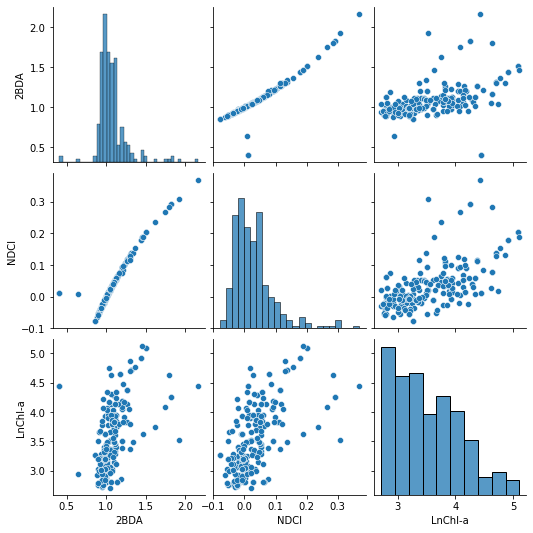

In [40]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(MergedData3[list])

In [41]:
# Extract independent variables (X) & dependent variable (Y)
X = MergedData3[X_columns]
X = add_constant(X)
Y = MergedData3['LnChl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                LnChl-a   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     70.03
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           2.98e-23
Time:                        14:15:48   Log-Likelihood:                -109.06
No. Observations:                 184   AIC:                             224.1
Df Residuals:                     181   BIC:                             233.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0017      0.428     11.690      0.0

In [42]:
# Get predictions
LnY_predict = result.predict(X_test)
print('Natural logarithm of predicted Y:', LnY_predict)

Natural logarithm of predicted Y: 519     3.458569
118     3.216247
899     3.339872
936     3.095757
284     3.379316
          ...   
263     3.650451
1223    3.655602
198     3.225009
629     3.360628
1439    3.649184
Length: 79, dtype: float64


In [43]:
import math

Y_predict = np.exp(LnY_predict)

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 1.1e+03
MAE 30.3
RMSE 33.1
